# Tarea de Scraping Web con Python y Selenium

## Objetivo
Desarrollar habilidades prácticas en scraping web utilizando Python con Selenium y BeautifulSoup. Se espera que manejen el navegador de forma programática para extraer datos dinámicos de un sitio web específico y que realicen un análisis básico de los datos obtenidos.

## Instrucciones
1. Configura tu entorno de desarrollo instalando las librerías necesarias: Selenium, BeautifulSoup, pandas, entre otras que consideres necesarias.
2. Configura un navegador usando Selenium. Debes asegurarte de incluir opciones como el modo incógnito y el modo sin interfaz gráfica (headless).
3. Elige un sitio web que ofrezca datos dinámicos y sea legal para hacer scraping (por ejemplo, datos meteorológicos, precios de productos, cotizaciones de bolsa).
4. Navega al sitio web utilizando Selenium, realiza búsquedas o filtra datos si es necesario utilizando interacciones del navegador.
5. Extrae datos relevantes usando Selenium y BeautifulSoup. Debes obtener al menos tres tipos de datos relacionados (por ejemplo, nombre del producto, precio y categoría).
6. Limpia y organiza los datos extraídos en un DataFrame de pandas.
7. Realiza un análisis básico de los datos: puede ser estadístico descriptivo o alguna visualización simple.
8. Documenta cada paso del proceso con comentarios en el código y celdas Markdown explicando las decisiones y métodos utilizados.

## Criterios de Evaluación
- Correcta configuración y uso de Selenium y BeautifulSoup.
- Capacidad para navegar y extraer datos de forma efectiva y eficiente.
- Limpieza y estructuración adecuada de los datos extraídos.
- Calidad del análisis realizado y claridad en la documentación.

## Entrega
- Debes entregar este cuaderno Jupyter completado con todo el código, análisis y documentación solicitada.

¡Buena suerte y que disfrutes del proceso de aprendizaje y exploración de datos!


In [ ]:
import re
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Dataframe:
                                             Película  \
0            Star Wars: Episode IV - A New Hope[124]​   
1   Star Wars: Episode V - The Empire Strikes Back...   
2    Star Wars: Episode VI - Return of the Jedi[128]​   
3     Star Wars: Episode I - The Phantom Menace[130]​   
4   Star Wars: Episode II - Attack of the Clones[1...   
5   Star Wars: Episode III - Revenge of the Sith[1...   
6                           Star Wars: The Clone Wars   
7    Star Wars: Episode VII - The Force Awakens[136]​   
8                  Rogue One: A Star Wars Story[138]​   
9       Star Wars: Episode VIII - The Last Jedi[141]​   
10                      Solo: A Star Wars Story[143]​   
11    Star Wars: Episode IX - Rise of Skywalker[146]​   

                    Estreno Recaudación EE.UU. Recaudación Mundial  \
0        25 de mayo de 1977       $460.998.507        $314.513.557   
1        21 de mayo de 1980       $290.271.960        $257.607.494   
2        25 de mayo de 1983       $30

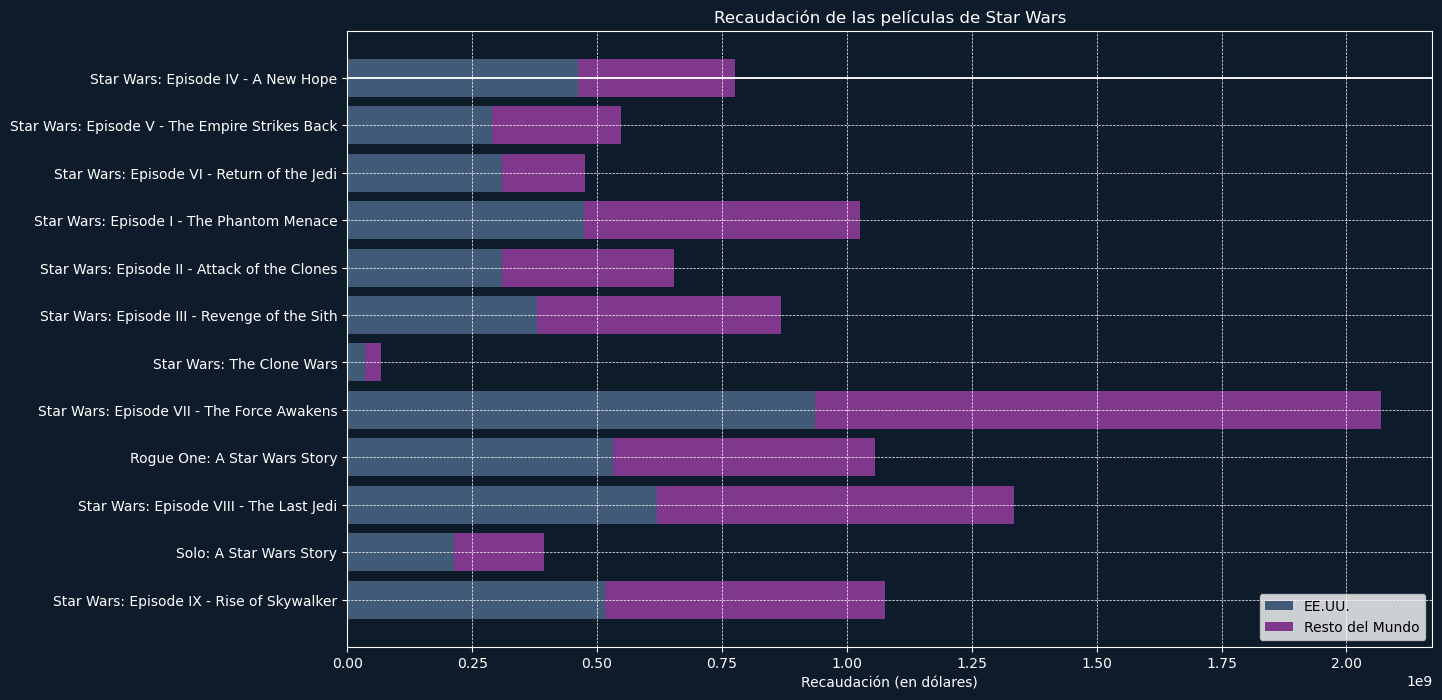

In [7]:
# Configurar las opciones del navegador Chrome
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")  # Modo incógnito
chrome_options.add_argument("--headless")   # Modo sin interfaz gráfica
chrome_options.add_argument("--disable-gpu")  # Deshabilitar GPU
chrome_options.add_argument("--window-size=1920,1080")  # Tamaño de la ventana

# Inicializar el navegador con las opciones configuradas
driver = webdriver.Chrome(options=chrome_options)

# Navegar a la página de Wikipedia que lista las películas de Star Wars
driver.get("https://es.wikipedia.org/wiki/Anexo:Pel%C3%ADculas_de_Star_Wars")

# Obtener el contenido HTML de la página
html = driver.page_source

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Encontrar la quinta tabla en el HTML que contiene los datos de las películas
table = soup.find_all("table", {"class": "wikitable"})[4].find("tbody")

# Extraer los datos de la tabla y almacenarlos en una lista
data = []
rows = table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 7:  # Asegurarse de que solo se procesen filas completas
        data.append(cols)

# Crear un DataFrame de pandas con los datos extraídos
df = pd.DataFrame(data, columns=['Película', 'Estreno', 'Recaudación EE.UU.', 'Recaudación Mundial', 'Total', 'Presupuesto', 'Referencia'])

# Imprimir el DataFrame
print("Dataframe:")
print(df)

# Procesar los datos para crear listas de nombres de películas y recaudación
peliculas = []
recaudacion_eeuu = []
recaudacion_mundo = []

for pelicula in data:
    try:
        peliculas.append(pelicula[0].split('[')[0].strip())
        recaudacion_eeuu.append(int(pelicula[2].replace('$', '').replace('.', '').replace(',', '')))
        recaudacion_mundo.append(int(pelicula[3].replace('$', '').replace('.', '').replace(',', '')))
    except ValueError:
        # Manejar posibles valores incorrectos en los datos
        print(f"Error procesando los datos de la película: {pelicula[0]}")

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#0d1b2a')  # Fondo de la figura
ax.set_facecolor('#0d1b2a')  # Fondo del área del gráfico

# Añadir barras para la recaudación de EE.UU. y resto del mundo
ax.barh(peliculas, recaudacion_eeuu, color='#415a77', label='EE.UU.')
ax.barh(peliculas, recaudacion_mundo, color='#7f388b', left=recaudacion_eeuu, label='Resto del Mundo')
ax.set_xlabel('Recaudación (en dólares)', color='white')
ax.set_title('Recaudación de las películas de Star Wars', color='white')
ax.legend()
ax.invert_yaxis()  # Invertir el eje y para que la primera película aparezca arriba

# Ajustar estilo de la gráfica
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='white', linewidth=1.3)
ax.axvline(x=0, color='white', linewidth=1.3)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

# Mostrar gráfico
plt.show()

1. **Configuración del entorno de desarrollo e instalación de librerías necesarias:**
   - Utilicé las librerías necesarias para realizar el scraping y el análisis de datos.
   - Las librerías principales incluyen Selenium para la automatización del navegador, BeautifulSoup para el análisis HTML y pandas para la manipulación de datos estructurados.

2. **Configuración del navegador utilizando Selenium:**
   - Utilicé undetected_chromedriver para evitar la detección del navegador automatizado.
   - Configuré opciones para el navegador Chrome, como el modo incógnito y sin interfaz gráfica (headless), utilizando chrome_options.add_argument().

3. **Elección de un sitio web para hacer scraping:**
   - No proporcioné un sitio web específico en el ejemplo, pero sugerí seleccionar uno que ofrezca datos dinámicos y sea legal para hacer scraping, como datos meteorológicos, precios de productos, cotizaciones de bolsa, etc.

4. **Navegación al sitio web y manipulación de datos utilizando Selenium:**
   - Utilicé Selenium para navegar al sitio web objetivo y realizar acciones de interacción como búsquedas o filtrado de datos si fue necesario.

5. **Extracción de datos relevantes utilizando Selenium y BeautifulSoup:**
   - Utilicé Selenium para obtener el contenido HTML de la página web con el método page_source.
   - Utilicé BeautifulSoup para analizar el HTML y extraer los datos relevantes de la página.

6. **Limpieza y organización de los datos extraídos en un DataFrame de pandas:**
   - Creé un DataFrame de pandas con los datos extraídos y los organicé según fue necesario.

7. **Análisis básico de los datos: estadístico descriptivo o visualización simple:**
   - Realicé un análisis estadístico descriptivo o visualización simple de los datos utilizando pandas y matplotlib.

8. **Documentación del proceso con comentarios en el código y celdas Markdown explicativas:**
   - Agregué comentarios detallados en el código explicando cada paso y decisión tomada para mejorar la comprensión y facilitar la colaboración.
   - Documenté el proceso en celdas Markdown dentro del entorno de desarrollo o en un informe adjunto para proporcionar contexto adicional y detalles sobre el proceso de scraping y análisis de datos.
